

# Conformal Prediction
<img src="Logo.png" width=120 align='right'>

* Problem formulation
* Score function
* Conformal prediction for classification and regression problems
* Python implementation


### https://www.youtube.com/c/DrDataScience



### Overview 
<hr style="border:2px solid gray">

* Conformal prediction is a framework for quantifying uncertainty in the predictions made by arbitrary machine learning algorithms


* At its core, conformal prediction leverages statistical principles to establish a reliable measure of prediction uncertainty

* It does *not* rely on specific modeling assumptions, enhancing its applicability

* In this notebook, we will discuss three main ingredients of conformal prediction or CP

* Let $(x_i, y_i)\sim P$, $i=1,\ldots,n$, be i.i.d. feature and response pairs, from a distribution $P$ on $\mathcal{X}\times \mathcal{Y}$  

* Let $\alpha\in(0,1)$ represent the error level 

* Our goal is to find a prediction set 

$$\hat{C}:\mathcal{X}\mapsto \{\text{subset of } \mathcal{Y}\}$$

with the probability that for a new i.i.d. pair $(x_{n+1}, y_{n+1})\sim P$, we get 

$$\text{Prob}\big(y_{n+1}\in\hat{C}(x_{n+1})\big)\geq 1-\alpha$$

where the probability is taken over all of our data $(x_i, y_i), i=1,\ldots,n+1$

* Thus, $1-\alpha$ is the target coverage level


### A trivial solution
<hr style="border:2px solid gray">

* Let us build the prediction set as follows 

$$\hat{C}=\begin{cases}\mathcal{Y} & \text{with prob } 1-\alpha\\\emptyset & \text{with prob } \alpha\end{cases}$$

* This choice will always have exactly $1-\alpha$ coverage 

$$\text{Prob}\big(y_{n+1}\in\hat{C}(x_{n+1})\big)=1-\alpha$$

* Can we achieve $\text{Prob}\big(y_{n+1}\in\hat{C}(x_{n+1})\big)\geq1-\alpha$ in *finite samples* by doing something *nontrivial*?
    * Adjust the size of $\hat{C}(x_{n+1})$ based on how difficult it is to predict $y_{n+1}$

### Review of quantile 
<hr style="border:2px solid gray">

* A quantile is value below which a certain portion of the data values will lie

* The empirical $(1-\alpha)$-quantile of a list of real numbers $s_1,\ldots,s_B$ can be written as quantile$(s_1,\ldots,s_B;1-\alpha)$ and is defined as 
$$\inf\big\{q\in\mathbb{R}:\frac{1}{B}\sum_{b=1}^B \mathbb{1}_{\{s_b\leq q\}}\geq 1-\alpha\big\}$$

### Ingredient 1 of CP: order statistics
<hr style="border:2px solid gray">

* Assume that there are no features at all and we have a sequence $y_i\in\mathbb{R}, i=1,\ldots,n$

* How to find $\text{Prob}(y_{n+1}\leq \hat{q})\geq 1- \alpha$ using the i.i.d. assumption?

* The *rank* of $y_{n+1}$ is uniformly distributed over the values of $y_1,\ldots,y_{n+1}$

$$\text{Prob}\big(y_{n+1} \text{ is among} \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n+1}\big)\geq 1-\alpha$$

$$\text{Prob}\big(y_{n+1}> \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n+1}\big)< \alpha$$

$$\text{Prob}\big(y_{n+1}> \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}\big)< \alpha$$

* Therefore 

$$\text{Prob}\big(y_{n+1} \leq  \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}\big)\geq 1-\alpha$$

and 

$$\hat{q}=\lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}$$

### CP in regression problems
<hr style="border:2px solid gray">

* Let us consider a regression problem, where $\hat{f}(x)$ is a prediction for the value of $y$ that we would expect to see at $x$

* Find residuals and compute $\hat{q}$

$$r_i = |y_i - \hat{f}(x_i)|, i=1,\ldots,n$$

$$\hat{q}= \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } r_1,\ldots, r_n$$

* Thus, we have 

$$\hat{C}(x_{n+1})=\big\{y: |y-\hat{f}(x_{n+1})|\leq \hat{q}\big\}$$

or, we can write this as follows

$$\hat{C}(x_{n+1})=\big[\hat{f}(x_{n+1})-\hat{q}, \hat{f}(x_{n+1})+\hat{q}\big]$$

* Caveat: The model has seen $x_1,\ldots,x_n$ during the training process, but not the test point $x_{n+1}$

    * The rank of the residual $r_{n+1}$ is not uniformly distributed

### Ingredient 2 of CP: calibration set
<hr style="border:2px solid gray">

* Divide the available data into two disjoint sets: one set used for training the underlying model (the proper training set) and one set for calibrating the prediction (the calibration set)

    * $\mathcal{D}_1$: indices of training samples ($n_1$ data points)
    * $\mathcal{D}_2$: indices of calibration samples ($n_2$ data points)
    
* Fit $\hat{f}$ using the training data set $\mathcal{D}_1$ and compute residuals using $\mathcal{D}_2$

$$r_i = |y_i - \hat{f}(x_i)|, i\in\mathcal{D}_2$$

* Find the quantile 

$$\hat{q}= \lceil (1-\alpha)(n_2+1)\rceil \text{ smallest of } r_i, i\in\mathcal{D}_2$$

* Construct the prediction interval

$$\hat{C}(x_{n+1})=\big[\hat{f}(x_{n+1})-\hat{q}, \hat{f}(x_{n+1})+\hat{q}\big]$$

### Ingredient 3 of CP: score function
<hr style="border:2px solid gray">

* We used residuals as negatively-oriented score functions, that is, lower values are better 
* However, we can assign a ``conformity score`` to each point in the calibration set 

$$s_i=s(x_i, y_i), i\in\mathcal{D}_2$$

and we then build the set 

$$\hat{C}(x)=\big\{y: s(x,y)\leq \lceil (1-\alpha)(n_2+1)\rceil \text{ smallest of } s_i, i\in\mathcal{D}_2 \big\}$$

* The scoring function is a metric used to assess the quality of predictions

* On the other hand, if we use positively-oriented scores (i.e., higher scores are desirable), we have to make a small adjustment

$$\hat{C}(x)=\big\{y: s(x,y)\geq \lfloor \alpha(n_2+1)\rfloor \text{ smallest of } s_i, i\in\mathcal{D}_2 \big\}$$



### CP using score function and quantile
<hr style="border:2px solid gray">

* Let us consider negatively-oriented score functions,  we see that  

$$\begin{align}\hat{C}(x)&= \big\{y: s(x,y)\leq \lceil (1-\alpha)(n_2+1)\rceil \text{ smallest of } s_i, i\in\mathcal{D}_2 \big\} \\ &= \big\{y: s(x,y)\leq \text{quantile}\big(s_1,\ldots,s_{n_2};\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}\big)\big\}\end{align}$$

* Take the empirical quantile at an ``adjusted level``: we use $\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}$ instead of $(1-\alpha)$

* Easy to remember: "test score $\leq$ adjusted quantile"

### Exchangeability is all you need
<hr style="border:2px solid gray">

* All that we need is knowing that $y_1,\ldots,y_{n+1}$ are exchangeable, which is a weaker than the i.i.d. assumption

* Exchangeability means that their joint distribution is unchanged under *permutations*

$$\big(y_1,\ldots,y_{n+1}\big)\stackrel{d}{=} \big(y_{\sigma(1)},\ldots,y_{\sigma(n+1)}\big), \;\text{for all permutations } \sigma$$


### Exchangeability Example
<hr style="border:2px solid gray">

* Suppose you have a basket containing 1 red ball and 2 blue balls. Draw out balls, one at a time and without replacement, and note the color. 

* Define 

$$X_i=\begin{cases}1 & \text{if the } i \text{-th ball is red}\\ 0 & \text{if the } i \text{-th ball is blue}\end{cases}$$

The random variables $X_1,X_2,X_3$ are exchangeable. 

Proof: If the arguments for $\text{Prob}(X_1=x_1, X_2=x_2, X_3=x_3)$ are anything other than two 0's and one 1, regardless of the order, the probability is zero. So, we must only check arguments that are permutations of $(1,0,0)$.

$$\text{Prob}(X_1=1, X_2=0, X_3=0)=\frac{1}{3}\cdot1 \cdot 1=\frac{1}{3}$$

$$\text{Prob}(X_1=0, X_2=1, X_3=0)=\frac{2}{3}\cdot \frac{1}{2}  \cdot 1 =\frac{1}{3}$$

$$\text{Prob}(X_1=0, X_2=0, X_3=1)=\frac{2}{3}\cdot \frac{1}{2}  \cdot 1 =\frac{1}{3}$$

Since these are all the same, the random variables $X_1$, $X_2$, and $X_3$ are exchangeable. 

### CP instructions
<hr style="border:2px solid gray">

1. Identify a heuristic notion of uncertainty using the trained model on $\mathcal{D}_1$

2. Define the score function $s(x,y)\in\mathbb{R}$ such that higher scores represent worse agreement between $x$ and $y$

3. Compute $\hat{q}$

$$\hat{q}=\text{quantile}\big(s_1,\ldots,s_{n_2};\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}\big)$$
    
4. Use this quantile to form the prediction set 

$$\hat{C}\big(x_{\text{test}}\big)=\big\{y: s(x_{\text{test}}, y)\leq \hat{q}\big\}$$

### Classification with softmax
<hr style="border:2px solid gray">

1. We use the softmax score as a heuristic notion of uncertainty

2. Define the score function as "$1$ - softmax output of the true class"

$$s(x_i, y_i)=1 - \hat{f}(x_i)_{y_i}$$

3. Find the empirical quantile $\hat{q}$ at the adjusted level $\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}$

4. Construct the prediction set 

$$\begin{align}\hat{C}\big(x_{\text{test}}\big)&=\big\{y: 1 - \hat{f}(x_{\text{test}})_y\leq \hat{q}\big\}\\ &= \big\{y: \hat{f}(x_{\text{test}})_y\geq 1 - \hat{q}\big\}\end{align}$$


In [1]:
# How can we find the softmax output of the true class? 

import numpy as np 

np.random.seed(4)

A = np.random.randn(2, 3) # 2 samples, 3 classes 

A_prob = np.exp(A)/np.exp(A).sum(axis=1, keepdims=True)

print(A_prob)

[[0.34263822 0.53703581 0.12032597]
 [0.69861461 0.22979767 0.07158772]]


In [2]:
labels = np.array([1,0]) # labels for the 2 samples

In [3]:
# Not recommended 
scores = np.zeros(A_prob.shape[0])

for loc, cls in enumerate(labels):
    scores[loc] = A_prob[loc, cls]

print(scores)

[0.53703581 0.69861461]


In [4]:
# How about this one?
scores = A_prob[:, labels]

print(scores)

[[0.53703581 0.34263822]
 [0.22979767 0.69861461]]


In [5]:
# Does this solve the problem?

scores = A_prob[np.arange(2), labels]

print(scores)

[0.53703581 0.69861461]


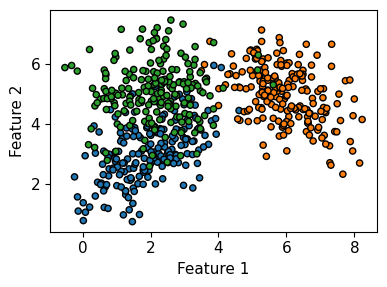

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

# Set random seed for reproducibility
np.random.seed(5)

# Generate synthetic data for three-class classification
mean_class_1 = [2, 3]
cov_class_1 = [[1, 0.5], [0.5, 1]]
data_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, 200)

mean_class_2 = [6, 5]
cov_class_2 = [[1, -0.5], [-0.5, 1]]
data_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, 200)

mean_class_3 = [2, 5]
cov_class_3 = [[1, 0], [0, 1]]
data_class_3 = np.random.multivariate_normal(mean_class_3, cov_class_3, 200)

# Combine the three classes into a single dataset
X = np.vstack((data_class_1, data_class_2, data_class_3))
y = np.hstack((np.zeros(200, dtype=int), np.ones(200, dtype=int),
               2 * np.ones(200, dtype=int)))  

# Plot the synthetic data
plt.rcParams.update({'font.size': 11, "figure.figsize": (4,3)})
colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
y_col = list(map(colors.get, y))

plt.scatter(X[:, 0], X[:, 1], c=y_col, marker='o', s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [7]:
# Divide the data into three sets: training, calibration, and testing 

from sklearn.model_selection import train_test_split


X_train_cal, X_test, y_train_cal, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42)


X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_cal, y_train_cal, test_size=1/2, random_state=42)

print(X_train.shape, X_cal.shape, X_test.shape)

(200, 2) (200, 2) (200, 2)


In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_prob = clf.predict_proba(X_cal)

print(y_prob[:5])

[[8.85126526e-01 3.22633827e-05 1.14841211e-01]
 [7.61893964e-02 5.11431650e-01 4.12378953e-01]
 [6.82677859e-02 2.89546593e-05 9.31703259e-01]
 [1.71800476e-01 9.33127633e-03 8.18868247e-01]
 [8.06669635e-01 4.16252408e-02 1.51705125e-01]]


In [9]:
# Get calibration scores 

n2 = X_cal.shape[0]

cal_scores = 1 - y_prob[np.arange(n2), y_cal]

print(cal_scores[:5])

[0.11487347 0.48856835 0.06829674 0.18113175 0.19333037]


In [10]:
# Get adjusted quantile

def find_quantile(cal_scores, n2, alpha):

    q_level = np.ceil((n2+1)*(1-alpha))/n2

    qhat = np.quantile(cal_scores, q_level, method='higher')
    
    return qhat 

In [11]:
# Plot calibration scores and adjusted quantile for various alpha 

def plot_scores(alphas, cal_scores, quantiles):
    colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c"}
    plt.figure(figsize=(5, 3))
    plt.rcParams.update({'font.size': 12})
    plt.hist(cal_scores, bins="auto")
    for i, quantile in enumerate(quantiles):
        plt.vlines(
            x=quantile,
            ymin=0,
            ymax=150,
            color=colors[i],
            ls="dashed",
            label=f"alpha = {alphas[i]}"
        )
    plt.title("Distribution of scores")
    plt.legend()
    plt.xlabel("Scores")
    plt.ylabel("Count")
    plt.show()

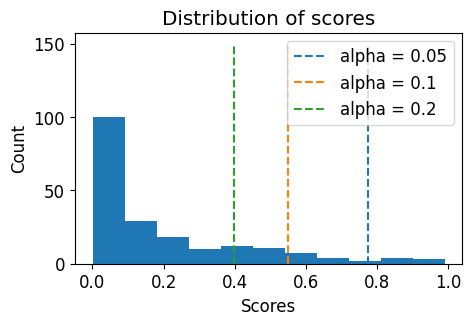

In [12]:
alphas = [0.05, 0.1, 0.2]

quantiles = [find_quantile(cal_scores, n2, alpha) for alpha in alphas]

plot_scores(alphas, cal_scores, quantiles)

In [13]:
# Build the prediction set (one alpha only)

qhat = find_quantile(cal_scores, n2, alpha=0.05)

prediction_sets = clf.predict_proba(X_test) >= (1-qhat) 

In [14]:
prediction_sets[:5]

array([[ True, False, False],
       [ True, False,  True],
       [ True, False,  True],
       [ True, False, False],
       [ True, False,  True]])

In [15]:
# Mean width of prediction set

prediction_sets.sum(axis=1).mean()


1.225

In [16]:
# Effective coverage score
# The fraction of true labels that lie within the prediction sets

prediction_sets[np.arange(X_test.shape[0]), y_test]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [17]:
prediction_sets[np.arange(X_test.shape[0]), y_test].mean()

0.96

In [18]:
# What if we choose a different alpha? 

qhat = find_quantile(cal_scores, n2, alpha=0.1)

prediction_sets = clf.predict_proba(X_test) >= (1-qhat) 

prediction_sets[np.arange(X_test.shape[0]), y_test].mean()

0.91

In [19]:
# What about the average size of the prediction set? 

prediction_sets.sum(axis=1).mean()

1.025

### Full conformal prediction 
<hr style="border:2px solid gray">

* Is there some way to get guaranteed coverage without splitting the data?

* In full conformal prediction, we still abide by the key ideas described previously, in which we construct residuals/scores in a way that treats all data symmetrically

* Rina Foygel Barber. Emmanuel J. Candès. Aaditya Ramdas. Ryan J. Tibshirani. "Predictive inference with the jackknife+." Ann. Statist. 49 (1) 486 - 507, February 2021
    * Available at https://doi.org/10.1214/20-AOS1965
    
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/jackknife.png?raw=true\" width=350>

* Suppose that we split the data into $K$ disjoint subsets $\mathcal{D}_1,\ldots,\mathcal{D}_K$

* Let $\hat{f}_{-\mathcal{D}_k}$ be the regression function fitted onto the entire data set when the $k$-th fold $\mathcal{D}_k$ is removed

* Find residuals

$$r_i = |y_i - \hat{f}_{-\mathcal{D}_{k(i)}}(x_i)|, i=1,\ldots,n$$

where $k(i)\in\{1,\ldots,K\}$ identifies the subset that contains $i$

* Build the prediction set 

$$\hat{C}(x_{n+1})=\big[\hat{q}^{-}\{\hat{f}_{-\mathcal{D}_{k(i)}}(x_{n+1})-r_i\},
\hat{q}^{+}\{\hat{f}_{-\mathcal{D}_{k(i)}}(x_{n+1})+r_i\}
\big]$$

where 

$$\hat{q}^{+}\{r_i\}= \lceil (1-\alpha) (n+1) \rceil \text{ smallest of } r_1,\ldots,r_n$$

and 

$$\hat{q}^{-}\{r_i\}= \lfloor \alpha (n+1) \rfloor \text{ smallest of } r_1,\ldots,r_n$$


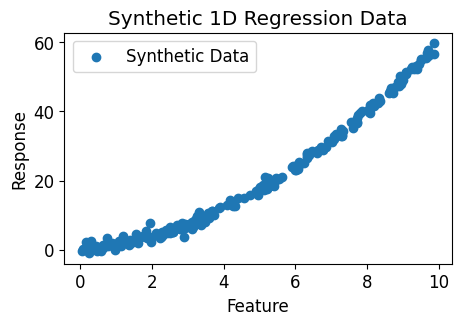

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 200

# Generate random values for the regressor (size of houses)
size = np.random.uniform(0, 10, num_points)

# Generate random error term
epsilon = np.random.normal(0, 1, num_points)

# Generate output/response
y = 0.5 * size** 2 + 1 * size + epsilon 

# Plot the synthetic dataset
plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})
plt.scatter(size, y, label='Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Response')
plt.title('Synthetic 1D Regression Data')
plt.legend()
plt.show()


In [21]:
X = size.reshape(-1,1)

print(X.shape, y.shape)

(200, 1) (200,)


In [22]:
X_target = np.linspace(2, 8, 5).reshape(-1,1)

print(X_target.shape,'\n', X_target)

(5, 1) 
 [[2. ]
 [3.5]
 [5. ]
 [6.5]
 [8. ]]


In [23]:
from keras.models import Sequential
from keras.layers import Dense

# Build the regression model
regr = Sequential()
regr.add(Dense(units=2, input_dim=1, activation='elu'))  # Hidden layer with 10 neurons and ELU activation
regr.add(Dense(units=1))  # Output layer (1 neuron for regression)

# Compile the model
regr.compile(optimizer='adam', loss='mean_squared_error')

Metal device set to: Apple M2 Max


In [24]:
from sklearn.model_selection import KFold

R_CV = np.zeros(len(X)) # residual for each point 
    
P_CV = np.zeros((len(X), len(X_target))) # predicted values for each target point
    
kf = KFold(n_splits=10) # cross validation 
    
for train_index, test_index in kf.split(X):
    
    # fit using the training data 
    regr.fit(X[train_index], y[train_index], epochs=1000,
             batch_size=len(train_index), verbose=0) 
    
    # find residuals for the hold-out data
    R_CV[test_index] = np.absolute(y[test_index] - regr.predict(X[test_index]).ravel())
    
    # prediction for the target data
    P_CV[test_index] = np.repeat(regr.predict(X_target).reshape(1,-1), len(test_index), axis=0)
    
alpha = 0.1    
        
lower = np.quantile( (P_CV - R_CV.reshape(-1,1)) , alpha, axis=0) # lower limit 
    
upper = np.quantile( (P_CV + R_CV.reshape(-1,1)), (1 - alpha), axis=0) # upper limit 
    

    

2023-11-05 09:06:39.569946: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 10ms/step


In [25]:
print(lower, '\n', upper)

[-1.79210187  6.91081295 12.99322697 17.71637054 23.99841632] 
 [12.67579403 20.18503239 28.20188995 36.66058821 45.49096347]


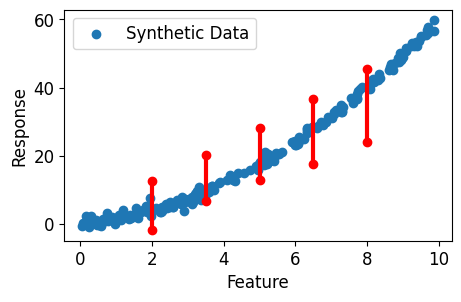

In [26]:
# Plot the data
plt.scatter(size, y, label='Synthetic Data')

# Plot vertical bars for prediction intervals
for ind, sample in enumerate(X_target.ravel()):
    plt.plot([sample, sample], 
             [lower[ind], upper[ind]], color='red', linewidth=3, 
             marker='o')



plt.xlabel('Feature')
plt.ylabel('Response')
plt.legend()
plt.show()